In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-11 18:41:05.989812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='GENERAL_ELC'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-11 09:30:00-04:00,162.350006,162.360001,160.559998,161.149994,161.149994,11628279,APPLE
2023-04-11 10:30:00-04:00,161.160004,161.199997,160.589996,160.909897,160.909897,6083197,APPLE
2023-04-11 11:30:00-04:00,160.899994,161.230103,160.509995,161.119904,161.119904,4322884,APPLE
2023-04-11 12:30:00-04:00,161.119995,161.520004,160.839996,161.411697,161.411697,4141413,APPLE
2023-04-11 13:30:00-04:00,161.415604,161.830002,161.309998,161.710693,161.710693,4299346,APPLE
...,...,...,...,...,...,...,...
2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11 09:30:00-04:00,162.350006,162.360001,160.559998,161.149994,161.149994,11628279,APPLE
1,2023-04-11 10:30:00-04:00,161.160004,161.199997,160.589996,160.909897,160.909897,6083197,APPLE
2,2023-04-11 11:30:00-04:00,160.899994,161.230103,160.509995,161.119904,161.119904,4322884,APPLE
3,2023-04-11 12:30:00-04:00,161.119995,161.520004,160.839996,161.411697,161.411697,4141413,APPLE
4,2023-04-11 13:30:00-04:00,161.415604,161.830002,161.309998,161.710693,161.710693,4299346,APPLE
...,...,...,...,...,...,...,...,...
17625,2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
17626,2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
17627,2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC
17628,2024-04-11 14:30:00-04:00,158.190002,158.239807,157.300095,157.300095,157.300095,648159,GENERAL_ELC


In [11]:
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-11 09:30:00-04:00,162.350006,162.360001,160.559998,161.149994,161.149994,11628279,APPLE
2023-04-11 10:30:00-04:00,161.160004,161.199997,160.589996,160.909897,160.909897,6083197,APPLE
2023-04-11 11:30:00-04:00,160.899994,161.230103,160.509995,161.119904,161.119904,4322884,APPLE
2023-04-11 12:30:00-04:00,161.119995,161.520004,160.839996,161.411697,161.411697,4141413,APPLE
2023-04-11 13:30:00-04:00,161.415604,161.830002,161.309998,161.710693,161.710693,4299346,APPLE
...,...,...,...,...,...,...,...
2024-04-11 11:30:00-04:00,170.514999,172.490005,170.399994,172.080002,172.080002,11559257,TESLA
2024-04-11 12:30:00-04:00,172.089996,174.289993,171.880005,173.839996,173.839996,11448297,TESLA
2024-04-11 13:30:00-04:00,173.850006,175.190002,173.779999,174.960007,174.960007,11754921,TESLA


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-04-11 09:30:00-04:00,161.149994
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697
2023-04-11 13:30:00-04:00,161.710693
...,...
2024-04-11 11:30:00-04:00,172.080002
2024-04-11 12:30:00-04:00,173.839996
2024-04-11 13:30:00-04:00,174.960007


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

15074

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.5322964 ],
       [-0.53307042],
       [-0.5323934 ],
       ...,
       [-0.48777618],
       [-0.48788229],
       [-0.48893674]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

15014

In [22]:
x_train.shape

(15014, 60, 1)

In [23]:
x_train

array([[[-0.5322964 ],
        [-0.53307042],
        [-0.5323934 ],
        ...,
        [-0.51959476],
        [-0.52011348],
        [-0.5205377 ]],

       [[-0.53307042],
        [-0.5323934 ],
        [-0.53145273],
        ...,
        [-0.52011348],
        [-0.5205377 ],
        [-0.51899838]],

       [[-0.5323934 ],
        [-0.53145273],
        [-0.53048884],
        ...,
        [-0.5205377 ],
        [-0.51899838],
        [-0.52002189]],

       ...,

       [[-0.23809571],
        [-0.23615759],
        [-0.23957895],
        ...,
        [-0.38645366],
        [-0.38821995],
        [-0.38271374]],

       [[-0.23615759],
        [-0.23957895],
        [-0.23114594],
        ...,
        [-0.38821995],
        [-0.38271374],
        [-0.38200451]],

       [[-0.23957895],
        [-0.23114594],
        [-0.22974617],
        ...,
        [-0.38271374],
        [-0.38200451],
        [-0.38877443]]])

In [24]:
com

'GENERAL_ELC'

In [25]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-11 09:30:00-04:00,75.426979,75.722267,74.983711,75.466881,75.466881,816383,GENERAL_ELC
2023-04-11 10:30:00-04:00,75.466881,75.626495,75.303268,75.498802,75.498802,408840,GENERAL_ELC
2023-04-11 11:30:00-04:00,75.498802,75.786110,75.387070,75.403030,75.403030,608672,GENERAL_ELC
2023-04-11 12:30:00-04:00,75.395050,75.498802,75.275337,75.458900,75.458900,713717,GENERAL_ELC
2023-04-11 13:30:00-04:00,75.465607,75.554672,75.187553,75.315247,75.315247,846814,GENERAL_ELC
...,...,...,...,...,...,...,...
2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC


In [26]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [27]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [28]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

In [30]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

151/151 [==============================] - 0s 1ms/step - loss: 0.3439


In [33]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [34]:
dataset

,Close
Datetime,
2023-04-11 09:30:00-04:00,161.149994
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697
2023-04-11 13:30:00-04:00,161.710693
...,...
2024-04-11 11:30:00-04:00,172.080002
2024-04-11 12:30:00-04:00,173.839996
2024-04-11 13:30:00-04:00,174.960007


In [35]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-10-27 10:30:00-04:00,210.070007
2023-10-27 11:30:00-04:00,208.800003
2023-10-27 12:30:00-04:00,208.089996
2023-10-27 13:30:00-04:00,206.125000
2023-10-27 14:30:00-04:00,207.380005
...,...
2024-04-11 11:30:00-04:00,172.080002
2024-04-11 12:30:00-04:00,173.839996
2024-04-11 13:30:00-04:00,174.960007


In [36]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [37]:
#x_test

In [38]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

25/25 [==============================] - 0s 541us/step


array([[0.01308208],
       [0.01265089],
       [0.0120765 ],
       [0.01177869],
       [0.01149577],
       [0.01102926],
       [0.0107555 ],
       [0.01043559],
       [0.01021461],
       [0.00977919],
       [0.00946918],
       [0.00909924],
       [0.00882063],
       [0.00863472],
       [0.00849545],
       [0.00838064],
       [0.00799855],
       [0.00781097],
       [0.00767577],
       [0.00766004],
       [0.00755604],
       [0.00749093],
       [0.00750126],
       [0.00743619],
       [0.00724707],
       [0.00717141],
       [0.00722519],
       [0.0071555 ],
       [0.00715153],
       [0.00708251],
       [0.00704799],
       [0.00709171],
       [0.00707661],
       [0.00709274],
       [0.00713506],
       [0.00712243],
       [0.00713889],
       [0.00727145],
       [0.00733094],
       [0.0072962 ],
       [0.00731847],
       [0.00733724],
       [0.00731209],
       [0.00730547],
       [0.00735465],
       [0.00734984],
       [0.0072767 ],
       [0.007

In [39]:
len(predictions)

793

In [40]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [41]:
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-11 09:30:00-04:00,75.426979,75.722267,74.983711,75.466881,75.466881,816383,GENERAL_ELC
2023-04-11 10:30:00-04:00,75.466881,75.626495,75.303268,75.498802,75.498802,408840,GENERAL_ELC
2023-04-11 11:30:00-04:00,75.498802,75.786110,75.387070,75.403030,75.403030,608672,GENERAL_ELC
2023-04-11 12:30:00-04:00,75.395050,75.498802,75.275337,75.458900,75.458900,713717,GENERAL_ELC
2023-04-11 13:30:00-04:00,75.465607,75.554672,75.187553,75.315247,75.315247,846814,GENERAL_ELC
...,...,...,...,...,...,...,...
2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC


In [42]:
predictions = scaler.inverse_transform(predictions)

In [43]:
mse = np.mean(predictions -f_app)
mse

254.29583869622832

In [44]:
predictions

array([[330.32446],
       [330.19073],
       [330.0125 ],
       [329.92017],
       [329.8324 ],
       [329.68768],
       [329.60275],
       [329.5035 ],
       [329.435  ],
       [329.29993],
       [329.20374],
       [329.089  ],
       [329.00256],
       [328.9449 ],
       [328.9017 ],
       [328.8661 ],
       [328.74756],
       [328.68936],
       [328.64743],
       [328.64255],
       [328.61032],
       [328.59012],
       [328.5933 ],
       [328.57315],
       [328.51447],
       [328.49097],
       [328.50766],
       [328.48605],
       [328.48483],
       [328.46344],
       [328.4527 ],
       [328.46628],
       [328.46158],
       [328.46658],
       [328.4797 ],
       [328.47577],
       [328.48093],
       [328.52203],
       [328.5405 ],
       [328.5297 ],
       [328.53662],
       [328.54242],
       [328.53464],
       [328.5326 ],
       [328.54782],
       [328.54633],
       [328.52368],
       [328.50577],
       [328.47836],
       [328.5066 ],


In [45]:
    import random
    random.random()

0.9482537485152218

In [46]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [47]:
    Final_pred

array([[-70.00604 ],
       [-70.13977 ],
       [-70.31799 ],
       [-70.41034 ],
       [-70.49811 ],
       [-70.64282 ],
       [-70.72775 ],
       [-70.826996],
       [-70.89551 ],
       [-71.03058 ],
       [-71.12677 ],
       [-71.241516],
       [-71.32794 ],
       [-71.38562 ],
       [-71.4288  ],
       [-71.46442 ],
       [-71.58295 ],
       [-71.64114 ],
       [-71.683075],
       [-71.68796 ],
       [-71.720184],
       [-71.74039 ],
       [-71.73721 ],
       [-71.757355],
       [-71.81604 ],
       [-71.83954 ],
       [-71.822845],
       [-71.84445 ],
       [-71.84567 ],
       [-71.867065],
       [-71.87781 ],
       [-71.86423 ],
       [-71.86893 ],
       [-71.86392 ],
       [-71.8508  ],
       [-71.85474 ],
       [-71.84958 ],
       [-71.80847 ],
       [-71.79001 ],
       [-71.80081 ],
       [-71.793884],
       [-71.788086],
       [-71.79587 ],
       [-71.79791 ],
       [-71.782684],
       [-71.78418 ],
       [-71.80682 ],
       [-71.8

In [48]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

1763

In [49]:
    len(data[138:252])

114

In [50]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [51]:
    valid

,Close_app,Predictions
0,75.466881,-70.006042
1,75.498802,-70.139771
2,75.403030,-70.317993
3,75.458900,-70.410339
4,75.315247,-70.498108
...,...,...
788,90.291298,-73.534760
789,91.061455,-73.538391
790,90.869995,-73.537354
791,90.798088,-73.541107


In [52]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11 09:30:00-04:00,162.350006,162.360001,160.559998,161.149994,161.149994,11628279,APPLE
1,2023-04-11 10:30:00-04:00,161.160004,161.199997,160.589996,160.909897,160.909897,6083197,APPLE
2,2023-04-11 11:30:00-04:00,160.899994,161.230103,160.509995,161.119904,161.119904,4322884,APPLE
3,2023-04-11 12:30:00-04:00,161.119995,161.520004,160.839996,161.411697,161.411697,4141413,APPLE
4,2023-04-11 13:30:00-04:00,161.415604,161.830002,161.309998,161.710693,161.710693,4299346,APPLE
...,...,...,...,...,...,...,...,...
17625,2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
17626,2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
17627,2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC
17628,2024-04-11 14:30:00-04:00,158.190002,158.239807,157.300095,157.300095,157.300095,648159,GENERAL_ELC


In [53]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-04-11 09:30:00-04:00,161.149994
1,2023-04-11 10:30:00-04:00,160.909897
2,2023-04-11 11:30:00-04:00,161.119904
3,2023-04-11 12:30:00-04:00,161.411697
4,2023-04-11 13:30:00-04:00,161.710693
...,...,...
17625,2024-04-11 11:30:00-04:00,156.380005
17626,2024-04-11 12:30:00-04:00,157.416901
17627,2024-04-11 13:30:00-04:00,158.175003
17628,2024-04-11 14:30:00-04:00,157.300095


In [54]:
    dfxf['Datetime']

0        2023-04-11 09:30:00-04:00
1        2023-04-11 10:30:00-04:00
2        2023-04-11 11:30:00-04:00
3        2023-04-11 12:30:00-04:00
4        2023-04-11 13:30:00-04:00
                   ...            
17625    2024-04-11 11:30:00-04:00
17626    2024-04-11 12:30:00-04:00
17627    2024-04-11 13:30:00-04:00
17628    2024-04-11 14:30:00-04:00
17629    2024-04-11 15:30:00-04:00
Name: Datetime, Length: 17630, dtype: object

In [55]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [56]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-04-11 09:30:00-04:00,161.149994
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697
2023-04-11 13:30:00-04:00,161.710693
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [57]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

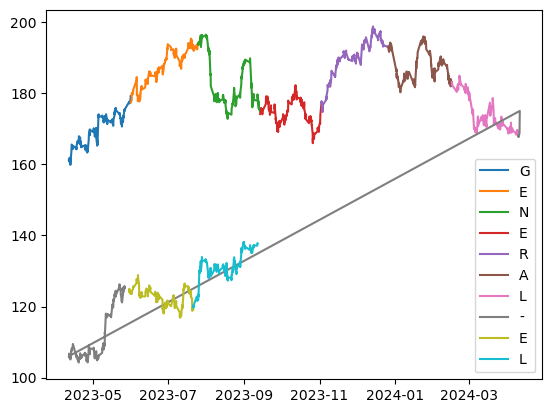

In [58]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [59]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-11 09:30:00-04:00,75.426979,75.722267,74.983711,75.466881,75.466881,816383,GENERAL_ELC
2023-04-11 10:30:00-04:00,75.466881,75.626495,75.303268,75.498802,75.498802,408840,GENERAL_ELC
2023-04-11 11:30:00-04:00,75.498802,75.786110,75.387070,75.403030,75.403030,608672,GENERAL_ELC
2023-04-11 12:30:00-04:00,75.395050,75.498802,75.275337,75.458900,75.458900,713717,GENERAL_ELC
2023-04-11 13:30:00-04:00,75.465607,75.554672,75.187553,75.315247,75.315247,846814,GENERAL_ELC
...,...,...,...,...,...,...,...
2024-04-11 11:30:00-04:00,155.889999,156.529999,155.809998,156.380005,156.380005,325372,GENERAL_ELC
2024-04-11 12:30:00-04:00,156.410004,157.559998,156.360001,157.416901,157.416901,470523,GENERAL_ELC
2024-04-11 13:30:00-04:00,157.449997,158.440002,157.199997,158.175003,158.175003,539467,GENERAL_ELC


In [60]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [61]:
    df_app_c

,Close
Datetime,
2023-04-11 09:30:00-04:00,75.466881
2023-04-11 10:30:00-04:00,75.498802
2023-04-11 11:30:00-04:00,75.403030
2023-04-11 12:30:00-04:00,75.458900
2023-04-11 13:30:00-04:00,75.315247
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [62]:
    dfxfs

,Close
Datetime,
2023-04-11 09:30:00-04:00,161.149994
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697
2023-04-11 13:30:00-04:00,161.710693
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [63]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-04-11 09:30:00-04:00,75.466881
2023-04-11 10:30:00-04:00,75.498802
2023-04-11 11:30:00-04:00,75.403030
2023-04-11 12:30:00-04:00,75.458900
2023-04-11 13:30:00-04:00,75.315247
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [64]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-04-11 09:30:00-04:00,75.466881
2023-04-11 10:30:00-04:00,75.498802
2023-04-11 11:30:00-04:00,75.403030
2023-04-11 12:30:00-04:00,75.458900
2023-04-11 13:30:00-04:00,75.315247
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [65]:
    dfxfs

,Close
Datetime,
2023-04-11 09:30:00-04:00,161.149994
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697
2023-04-11 13:30:00-04:00,161.710693
...,...
2024-04-11 11:30:00-04:00,156.380005
2024-04-11 12:30:00-04:00,157.416901
2024-04-11 13:30:00-04:00,158.175003


In [66]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([ 75.4668808 ,  75.49880219,  75.4030304 , ..., 158.17500305,
       157.3000946 , 157.67999268])

In [67]:
    fcv = np.array(dfxfs['Close'])

In [68]:
    len(fcv)

17630

In [69]:
    mseallfe = np.zeros(len(dfxfs))

In [70]:
    dfxfs[1:4]

,Close
Datetime,
2023-04-11 10:30:00-04:00,160.909897
2023-04-11 11:30:00-04:00,161.119904
2023-04-11 12:30:00-04:00,161.411697


In [71]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [72]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

17630

In [73]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

17630

In [74]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [75]:
    len(final_df)

17630

In [76]:
    len(mseallfe)

17630

In [77]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([246.83310699, 246.32099152, 246.83677673, ..., 158.17500305,
       157.3000946 , 157.67999268])

In [78]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,246.833107
1,246.320992
2,246.836777
3,247.364494
4,248.106140
...,...
17625,156.380005
17626,157.416901
17627,158.175003
17628,157.300095


In [79]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [80]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [81]:
    datasetx

,Close
1746,184.090012
1747,184.065002
1748,184.930008
1749,180.239990
1750,178.539993
...,...
15700,214.429657
15701,216.705902
15702,217.614868
15703,216.442825


In [82]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[-0.79259366],
       [-0.79264118],
       [-0.79099762],
       ...,
       [-0.72889447],
       [-0.73112142],
       [-0.73083972]])

In [83]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([-0.79259366, -0.79264118, -0.79099762, -0.79990893, -0.80313903,
       -0.80160016, -0.802398  , -0.80372804, -0.80146699, -0.80230299,
       -0.79695908, -0.7962988 , -0.79382872, -0.78745766, -0.78101286,
       -0.77722278, -0.77680421, -0.88282154, -0.88421225, -0.88214921,
       -0.88132433, -0.88025336, -0.87980102, -0.88152803, -0.88036326,
       -0.88326843, -0.88225657, -0.88182255, -0.88506928, -0.88541052,
       -0.88514511, -0.87589602, -0.87601076, -0.87686414, -0.87614211,
       -0.87470974, -0.87424131, -0.87412402, -0.87441589, -0.8733342 ,
       -0.87372073, -0.87376438, -0.87273678, -0.87135698, -0.8710266 ,
       -0.88487985, -0.88618339, -0.88670253, -0.88483272, -0.88550911,
       -0.88502895, -0.88467176, -0.89008531, -0.88943315, -0.88908945,
       -0.89080104, -0.89060253, -0.89246861, -0.8921518 , -0.89647392])]
[-0.8931961175608605]

[array([-0.79259366, -0.79264118, -0.79099762, -0.79990893, -0.80313903,
       -0.80160016, -0.802398  , -0.8

In [84]:
    len(x_trainx)

13202

In [85]:
    sdx

,Close
0,246.833107
1,246.320992
2,246.836777
3,247.364494
4,248.106140
...,...
17625,156.380005
17626,157.416901
17627,158.175003
17628,157.300095


In [86]:
    x_trainx.shape[0]

13202

In [87]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [88]:
    xtrainfinal.shape[0]

17630

In [89]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [90]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [92]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 694us/step - loss: 0.3878


In [93]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [94]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,415.539444
15009,414.965515
15010,418.046165
15011,416.567810
15012,418.177231
...,...
15700,214.429657
15701,216.705902
15702,217.614868
15703,216.442825


In [95]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [96]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 602us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [97]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [98]:
    predictionsx

array([[601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.2316],
       [601.

In [99]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

17630

In [100]:
    data

0        246.833107
1        246.320992
2        246.836777
3        247.364494
4        248.106140
            ...    
17625    156.380005
17626    157.416901
17627    158.175003
17628    157.300095
17629    157.679993
Name: Close, Length: 17630, dtype: float64

In [101]:
    datax = pd.DataFrame(data)
    datax

,Close
0,246.833107
1,246.320992
2,246.836777
3,247.364494
4,248.106140
...,...
17625,156.380005
17626,157.416901
17627,158.175003
17628,157.300095


In [102]:
    datax

,Close
0,246.833107
1,246.320992
2,246.836777
3,247.364494
4,248.106140
...,...
17625,156.380005
17626,157.416901
17627,158.175003
17628,157.300095


In [103]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[246.83310699 246.32099152 246.83677673 247.36449432 248.10614014
 247.31283569 246.64389801 248.44690704 246.94794464 247.59686279
 247.68888855 246.76015472 244.71996307 245.12023926 251.86363983
 251.92782593 252.68831635 253.63851166 255.23236084 255.66889954
 255.92061615 254.51702118 254.63251495 253.16165924 252.77990723
 253.70293427 253.65690613 254.29079437 252.41983032 252.60377502
 251.58074951 252.3242569  251.86064148 253.12178802 253.29935455
 254.03022003 253.87345123 254.08594513 253.71353149 254.94799805
 254.47589111 254.29542542 254.15789032 255.53759766 256.80718231
 256.72586823 256.78163147 256.50569153 256.18971252 254.52292633
 254.97433472 255.30683899 255.70141602 253.90359497 252.03009033
 253.67630768 251.07086945 250.83840942 250.38491821 250.40904999
 251.04878998 250.37789917 250.63059235 250.56567383 248.51959991
 249.03913116 249.59989929 250.41622162 250.78178406 250.77184296
 251.85277557 251.81270599 251.26990509 250.40385437 250.42093658
 249.79625

In [104]:
    valid = pd.DataFrame()

In [105]:
    valid

""


In [106]:
    np.array(data)

array([246.83310699, 246.32099152, 246.83677673, ..., 158.17500305,
       157.3000946 , 157.67999268])

In [107]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [108]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [109]:
    valid

,predictions,close app
0,252.211365,246.833107
1,251.750488,246.320992
2,252.214691,246.836777
3,252.689636,247.364494
4,253.357117,248.106140
...,...,...
692,286.542786,284.979118
693,287.110413,285.609795
694,287.720673,286.287865
695,285.999329,284.375267


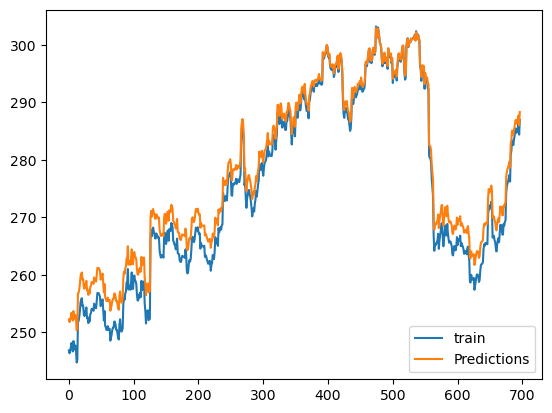

[[2.3191071  2.42700911 2.31831577 ... 5.83750802 5.6713228  5.8937682 ]
 [2.21751692 2.33012806 2.21668932 ... 5.87685089 5.71181046 5.93273799]
 [2.31982417 2.42769431 2.31903308 ... 5.8372231  5.67102952 5.893486  ]
 ...
 [6.39433856 6.43425839 6.3940516  ... 1.19699955 1.82904499 0.87909286]
 [6.25829223 6.2990743  6.25799903 ... 0.53715554 1.27438675 0.97393005]
 [6.44061796 6.48025271 6.44033307 ... 1.42365799 1.98479211 1.16910154]]


In [110]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [111]:
error_main.shape

(697, 697)

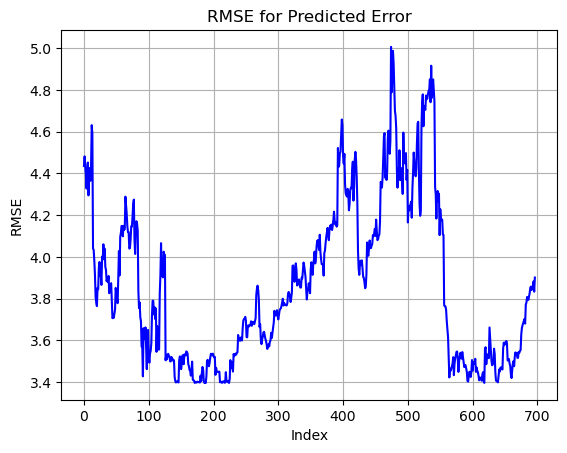

In [112]:
error = np.mean(error_main, axis=1)
plt.plot(np.arange(697), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [113]:
final_pred

array([252.21136475, 251.75048828, 252.21469116, 252.68963623,
       253.3571167 , 252.64312744, 252.04107666, 253.66381836,
       252.31472778, 252.89874268, 252.98156738, 252.14572144,
       250.30957031, 250.6697998 , 256.73886108, 256.79663086,
       257.4810791 , 258.33624268, 259.77069092, 260.16357422,
       260.39013672, 259.12689209, 259.23083496, 257.90707397,
       257.56350708, 258.39422607, 258.3527832 , 258.92327881,
       257.23944092, 257.40496826, 256.48425293, 257.15341187,
       256.73614502, 257.87121582, 258.03100586, 258.68878174,
       258.54766846, 258.73895264, 258.40374756, 259.51477051,
       259.08990479, 258.92745972, 258.80368042, 260.04541016,
       261.18804932, 261.11486816, 261.16503906, 260.91668701,
       260.63232422, 259.13220215, 259.53848267, 259.83773804,
       260.19287109, 258.5748291 , 256.88867188, 258.37023926,
       256.02536011, 255.81616211, 255.40802002, 255.42974854,
       256.00549316, 255.40167236, 255.62911987, 255.57